# PREDICTIONS

## Loading Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import sys
from pathlib import Path

utils_path = Path("../0.Utils").resolve()
sys.path.append(str(utils_path))
from utils import COLS_TO_EXCLUDE

df = pd.read_csv('../../Datasets/final_tennis_dataset_symmetric.csv')

## DECISION TREE

In [11]:
# 1. Load the dataset
df = pd.read_csv('../../Datasets/final_tennis_dataset_symmetric.csv')

# 2. Clean the TOURNEY_DATE column and extract the year
df["TOURNEY_DATE"] = df["TOURNEY_DATE"].astype(str)
df["year"] = df["TOURNEY_DATE"].str[:4].astype(int)

# 3. Define the target and features
y = df['TARGET']
X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
X = X.select_dtypes(include=[np.number])  # Keep only numerical features

# 4. Temporal train/test split
train_mask = df["year"] <= 2023
test_mask  = df["year"] == 2024

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]

# 5. Quick inspection of year and date distribution (for debugging)
# print("Year distribution:\n", df["year"].value_counts().sort_index())
# print("\nSample TOURNEY_DATE values:\n", df["TOURNEY_DATE"].value_counts().sort_index().head())

# 6. Train a Decision Tree model
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=50,
    random_state=42
)
clf.fit(X_train, y_train)

# 7. Make predictions and evaluate the model
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print("\nResults on 2024 test set:")
print(f"Accuracy     : {acc:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"Log Loss     : {ll:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Feature importance analysis
importances = clf.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

print("\nTop 20 Feature Importances:")
for idx in sorted_idx[:20]:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")



Results on 2024 test set:
Accuracy     : 0.6405
F1 Score     : 0.6418
Log Loss     : 0.6232

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      2761
           1       0.64      0.64      0.64      2761

    accuracy                           0.64      5522
   macro avg       0.64      0.64      0.64      5522
weighted avg       0.64      0.64      0.64      5522

Confusion Matrix:
 [[1759 1002]
 [ 983 1778]]

Top 20 Feature Importances:
ELO_DIFF: 0.8409
ELO_SURFACE_DIFF: 0.0456
PLAYER1_SURFACE_MATCHES: 0.0394
PLAYER2_SURFACE_MATCHES: 0.0321
AGE_DIFF: 0.0149
RANK_RATIO: 0.0130
ATP_RANK_DIFF: 0.0045
BEST_OF: 0.0040
PLAYER1_ELO_SURFACE_BEFORE: 0.0013
PLAYER2_P_2NDWON_LAST_200: 0.0011
PLAYER1_P_ACE_LAST_200: 0.0006
PLAYER2_ELO_SURFACE_BEFORE: 0.0005
PLAYER1_P_DF_LAST_20: 0.0005
PLAYER2_P_DF_LAST_10: 0.0005
PLAYER1_P_BPSAVED_LAST_10: 0.0004
PLAYER1_P_1STWON_LAST_10: 0.0004
PLAYER2_P_DF_LAST_3: 0.0003
PLAYER1_P_1S

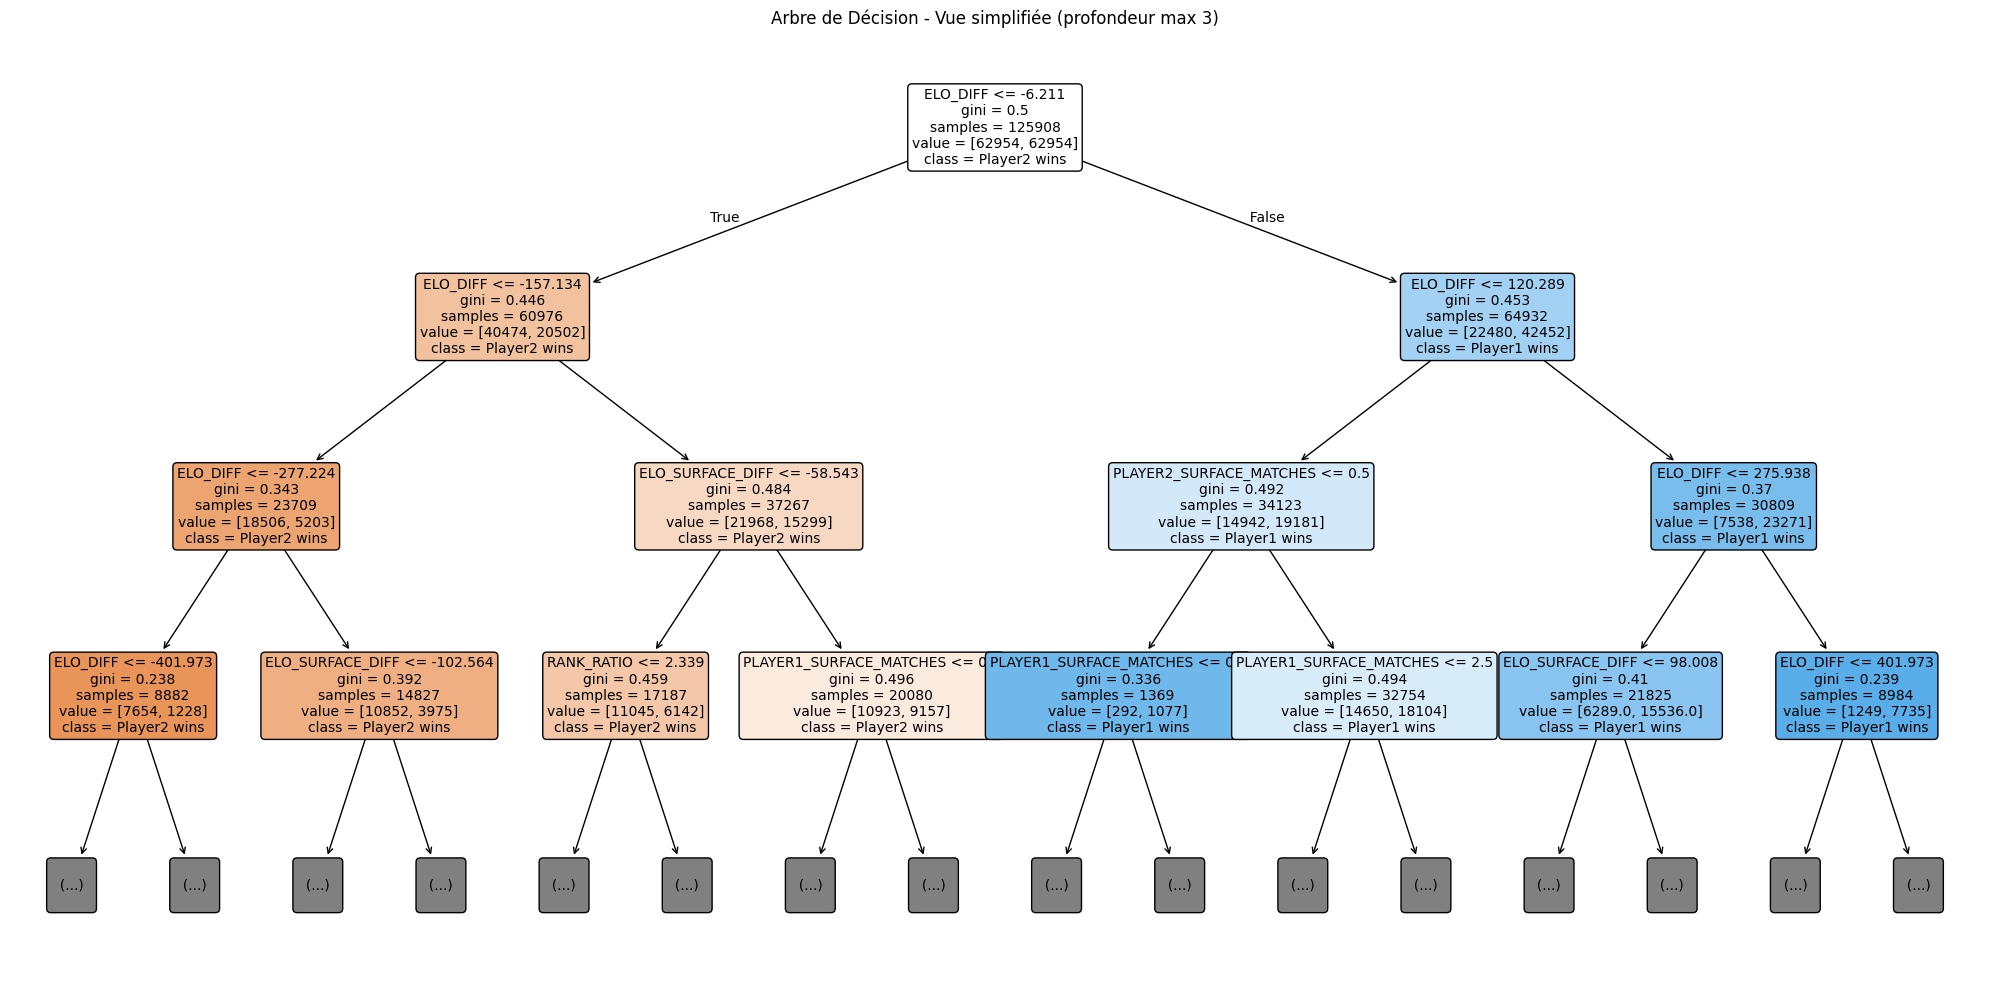

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Taille du plot adaptée à la profondeur
plt.figure(figsize=(20, 10))

# Affichage de l’arbre
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Player2 wins", "Player1 wins"],
    filled=True,
    rounded=True,
    max_depth=3,  # Tu peux changer cette valeur pour afficher plus ou moins de profondeur
    fontsize=10
)

plt.title("Arbre de Décision - Vue simplifiée (profondeur max 3)")
plt.tight_layout()
plt.show()

## RANDOM FOREST

Entraînement de la Random Forest...

Résultats sur le jeu de test :
Accuracy : 0.6490402028250634
F1 Score : 0.648658448150834
Log Loss : 0.6171934367258815

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      2761
           1       0.65      0.65      0.65      2761

    accuracy                           0.65      5522
   macro avg       0.65      0.65      0.65      5522
weighted avg       0.65      0.65      0.65      5522

Confusion Matrix:
 [[1795  966]
 [ 972 1789]]


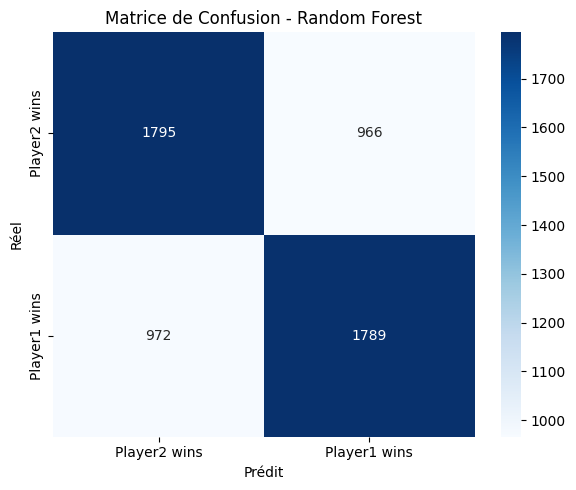

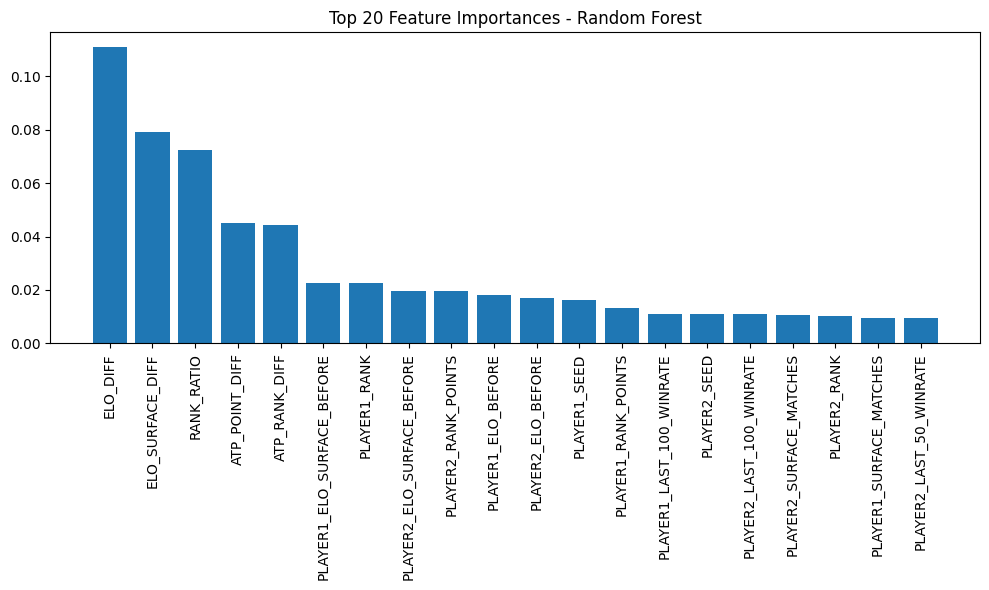

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('../../Datasets/final_tennis_dataset_symmetric.csv')

# 2. Clean the TOURNEY_DATE column and extract the year
df["TOURNEY_DATE"] = df["TOURNEY_DATE"].astype(str)
df["year"] = df["TOURNEY_DATE"].str[:4].astype(int)

# 3. Define the target and features
y = df['TARGET']
X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
X = X.select_dtypes(include=[np.number])  # Keep only numerical features

# 4. Temporal train/test split
train_mask = df["year"] <= 2023
test_mask  = df["year"] == 2024

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]

# 4. Création et entraînement de la Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=30,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # utile si léger déséquilibre
)

print("Entraînement de la Random Forest...")
rf.fit(X_train, y_train)

# 5. Prédictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# 6. Évaluation
print("\nRésultats sur le jeu de test :")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Log Loss :", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Affichage graphique de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player2 wins", "Player1 wins"],
            yticklabels=["Player2 wins", "Player1 wins"])
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 8. Affichage des 20 features les plus importantes
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances - Random Forest")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()

## Random forest with CV

In [22]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [8, 12, 16],
#     'min_samples_split': [10, 30, 50],
# }

# rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

# grid_search = GridSearchCV(
#     rf,
#     param_grid,
#     cv=3,
#     scoring='f1',
#     verbose=2,
#     n_jobs=-1
# )

# grid_search.fit(X, y)

# print("Meilleurs paramètres :", grid_search.best_params_)
# print("Meilleur score f1 :", grid_search.best_score_)

## XGBoost

Entraînement du modèle XGBoost...


/home/cytech/miniconda3/envs/TFM_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:56:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Résultats sur le jeu de test :
Accuracy : 0.6602680188337559
F1 Score : 0.6614940454709491
Log Loss : 0.6057000564512945

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      2761
           1       0.66      0.66      0.66      2761

    accuracy                           0.66      5522
   macro avg       0.66      0.66      0.66      5522
weighted avg       0.66      0.66      0.66      5522

Confusion Matrix:
 [[1813  948]
 [ 928 1833]]


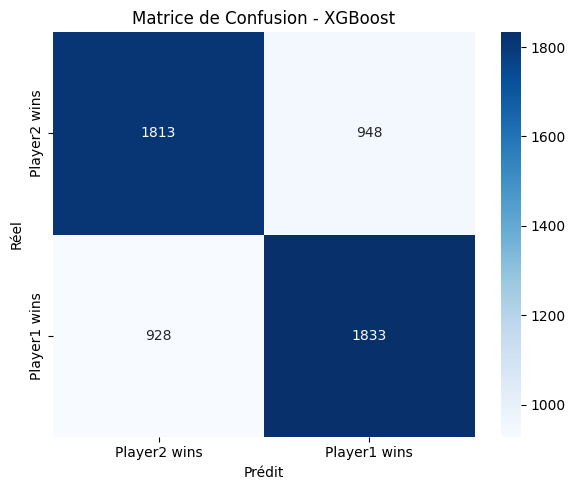

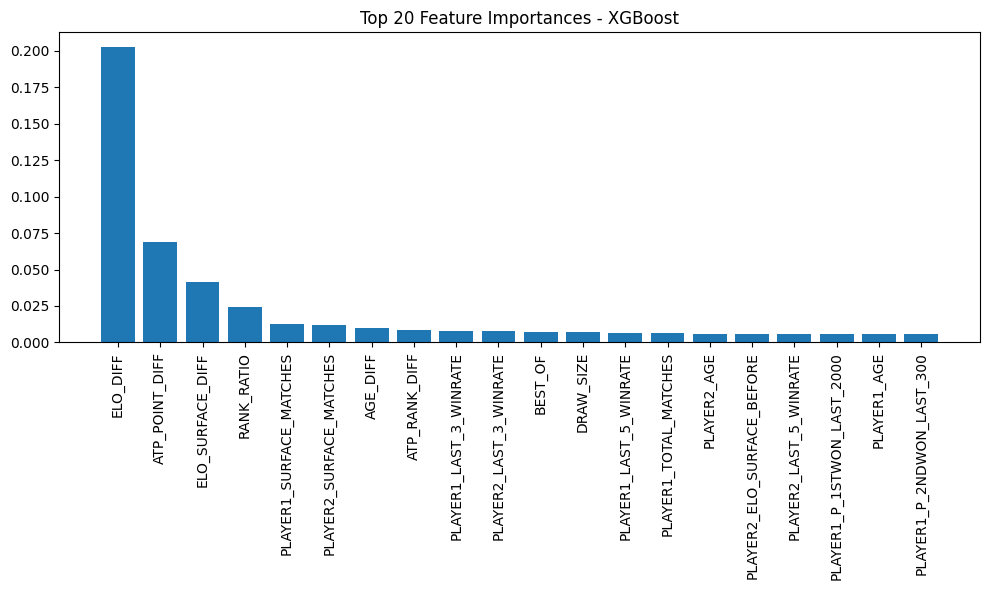

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('../../Datasets/final_tennis_dataset_symmetric.csv')

# 2. Clean the TOURNEY_DATE column and extract the year
df["TOURNEY_DATE"] = df["TOURNEY_DATE"].astype(str)
df["year"] = df["TOURNEY_DATE"].str[:4].astype(int)

# 3. Define the target and features
y = df['TARGET']
X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
X = X.select_dtypes(include=[np.number])  # Keep only numerical features

# 4. Temporal train/test split
train_mask = df["year"] <= 2023
test_mask  = df["year"] == 2024

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]

# 4. Entraînement XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("Entraînement du modèle XGBoost...")
xgb_model.fit(X_train, y_train)

# 5. Prédictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

# 6. Évaluation
print("\nRésultats sur le jeu de test :")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Log Loss :", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player2 wins", "Player1 wins"],
            yticklabels=["Player2 wins", "Player1 wins"])
plt.title("Matrice de Confusion - XGBoost")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 8. Importance des variables
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances - XGBoost")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()

In [27]:
xgb_model.save_model("../../Models/xgb_model.json")

### With only ELO_DIFF

Accuracy       : 0.6360014487504527
F1 Score       : 0.6404293381037567
Log Loss       : 0.6287719414159372
Brier Score    : 0.2201057635178531
ROC AUC        : 0.6975402856651496


/home/cytech/miniconda3/envs/TFM_env/lib/python3.12/site-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


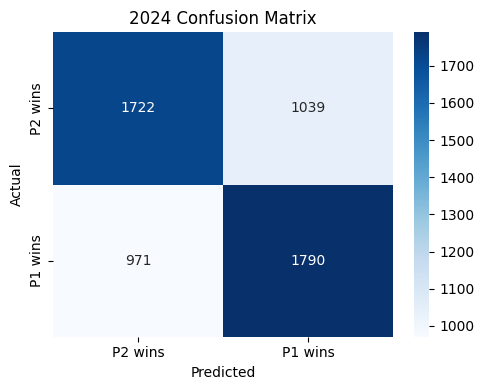

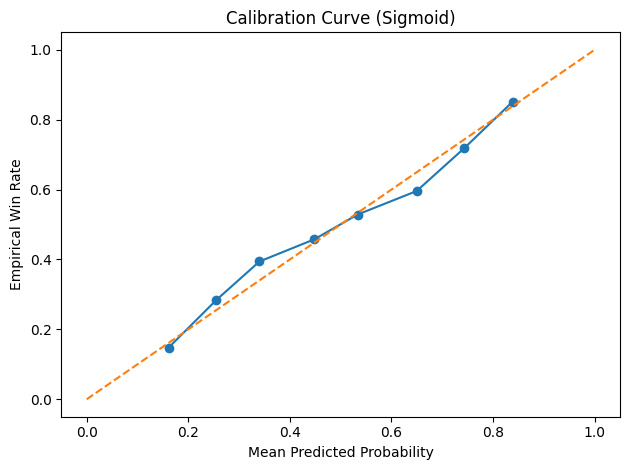

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score, f1_score, log_loss,
    brier_score_loss, roc_auc_score
)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

# 1. Load dataset
df = pd.read_csv('../../Datasets/final_tennis_dataset_symmetric.csv')

# 2. Extract year from TOURNEY_DATE
df["TOURNEY_DATE"] = df["TOURNEY_DATE"].astype(str)
df["year"] = df["TOURNEY_DATE"].str[:4].astype(int)

# 3. Keep only ELO_DIFF as feature
X = df[['ELO_DIFF']].copy()
y = df['TARGET']

# 4. Time-based split: train on years <= 2023, test on year == 2024
train_mask = df["year"] <= 2023
test_mask  = df["year"] == 2024

X_train_full, y_train_full = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

# Optional: split train into train + val for calibration
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# 5. Define and train XGBoost model
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "n_estimators": 300,
    "learning_rate": 0.03,
    "max_depth": 3,  # shallow tree since we have 1 variable
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist"
}

xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

# 6. Optional: calibrate the model
calib = CalibratedClassifierCV(xgb_clf, method='sigmoid', cv='prefit')
calib.fit(X_val, y_val)
model = calib

# 7. Evaluate on 2024 test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy       :", accuracy_score(y_test, y_pred))
print("F1 Score       :", f1_score(y_test, y_pred))
print("Log Loss       :", log_loss(y_test, y_prob))
print("Brier Score    :", brier_score_loss(y_test, y_prob))
print("ROC AUC        :", roc_auc_score(y_test, y_prob))

# 8. Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(
    pd.crosstab(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=["P2 wins", "P1 wins"],
    yticklabels=["P2 wins", "P1 wins"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("2024 Confusion Matrix")
plt.tight_layout()
plt.show()

# 9. Calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.figure()
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve (Sigmoid)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Empirical Win Rate")
plt.tight_layout()
plt.show()
